# Exploring players info

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime, date
sns.set_style('darkgrid')

In [2]:
df_players = pd.read_csv('data/tb_players.csv')

In [3]:
df_players.head(5)

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21


In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idPlayer        2716 non-null   int64 
 1   flFacebook      2716 non-null   int64 
 2   flTwitter       2716 non-null   int64 
 3   flTwitch        2716 non-null   int64 
 4   descCountry     2716 non-null   object
 5   dtBirth         2008 non-null   object
 6   dtRegistration  2716 non-null   object
dtypes: int64(4), object(3)
memory usage: 148.7+ KB


In [5]:
df_players['dtBirth'].nunique()

1692

In [6]:
print(df_players[df_players['dtBirth'].notna()].shape[0])
print(df_players[df_players['dtBirth'].isna()].shape[0])

2008
708


In [7]:
df_players['dtRegistration'].min()

'2013-06-16 09:59:06'

## Converting _dtRegistration_ to **datetime**

In [8]:
df_players['dtRegistration'] = pd.to_datetime(df_players['dtRegistration'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df_players['dtRegistration_year'] = df_players['dtRegistration'].dt.year
df_players['dtRegistration_year']

0       2021
1       2020
2       2020
3       2017
4       2021
        ... 
2711    2021
2712    2019
2713    2017
2714    2019
2715    2018
Name: dtRegistration_year, Length: 2716, dtype: int64

## Amount of registered players by year of registration

<AxesSubplot:xlabel='dtRegistration_year'>

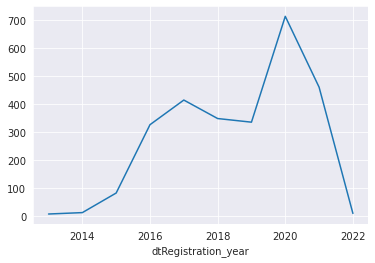

In [10]:
reg_year_count = df_players.groupby('dtRegistration_year')['dtRegistration_year'].count()

sns.lineplot(x=reg_year_count.index, y=reg_year_count.values)

In [11]:
df_players['dtRegistration_year'].min()

2013

## Registered players from each country

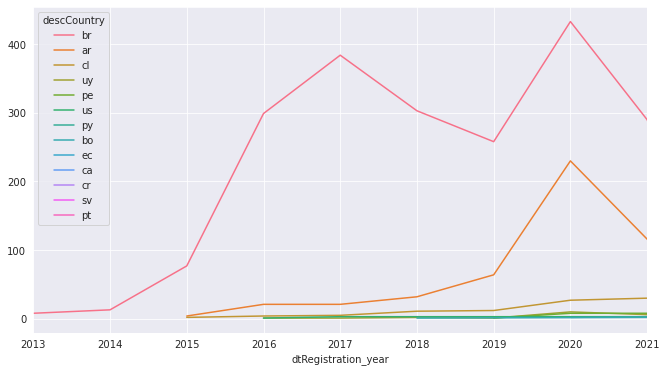

In [12]:
reg_year_count = df_players[['dtRegistration_year', 'descCountry']].value_counts()

plt.figure(figsize=(11, 6))
ax = sns.lineplot(data=reg_year_count, x='dtRegistration_year', y=reg_year_count.values, hue='descCountry')
ax.set_xlim(2013, 2021)
plt.show()

## Registered players comparing Brazil players and international players

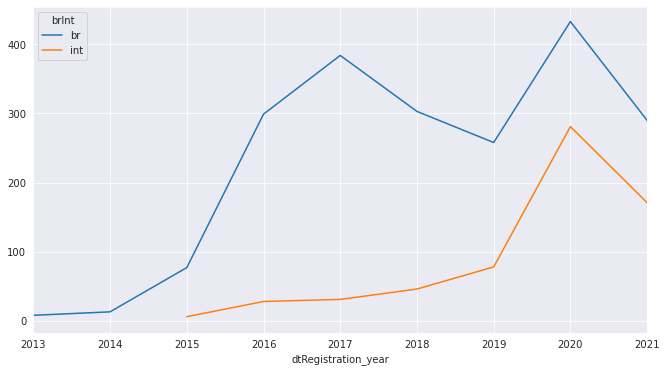

In [13]:
df_players['brInt'] = df_players.apply(lambda row: row['descCountry'] if row['descCountry'] == 'br' else 'int', axis=1)
reg_year_brazil_int = df_players[['dtRegistration_year', 'brInt']].value_counts()

plt.figure(figsize=(11, 6))
ax = sns.lineplot(data=reg_year_brazil_int, x='dtRegistration_year', y=reg_year_brazil_int.values, hue='brInt')
ax.set_xlim(2013, 2021)
plt.show()

## Analyzing players' age

In [14]:
df_players['dtBirth']

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
2711    2000-03-03 00:00:00
2712                    NaN
2713    2000-06-23 00:00:00
2714    2001-02-21 00:00:00
2715    1999-12-04 00:00:00
Name: dtBirth, Length: 2716, dtype: object

In [15]:
def age(born):
    if born is np.nan:
        return np.nan

    born = datetime.strptime(born, '%Y-%m-%d %H:%M:%S').date()
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_players['age'] = df_players['dtBirth'].apply(age)

In [16]:
df_players['age'].max()

77.0

### Players' age by country

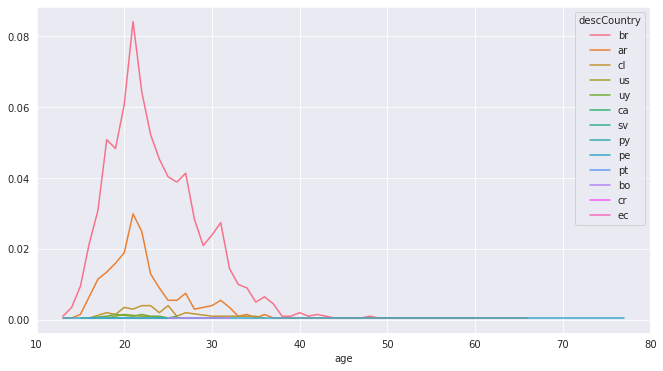

In [17]:
country_age = df_players[['descCountry', 'age']].value_counts()
percent_age = (country_age.values / country_age.values.sum())

plt.figure(figsize=(11, 6))
ax = sns.lineplot(data=country_age, x='age', y=percent_age, hue='descCountry')
ax.set_xlim(10, 80)
plt.show()

### Players' age from Brazil and international

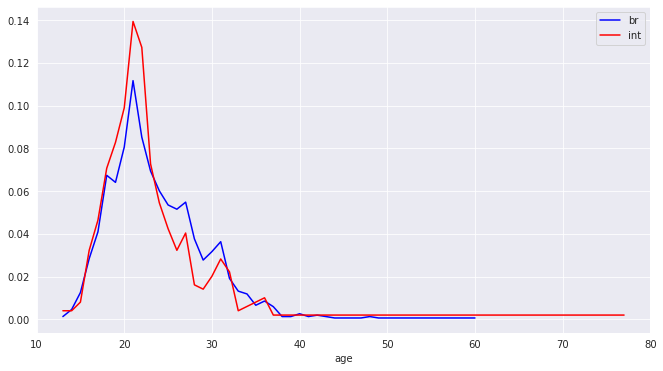

In [33]:
country_age_br = df_players[df_players['brInt'] == 'br'][['brInt', 'age']].value_counts()
country_age_int = df_players[df_players['brInt'] == 'int'][['brInt', 'age']].value_counts()

percent_age_br = (country_age_br.values / country_age_br.values.sum())
percent_age_int = (country_age_int.values / country_age_int.values.sum())

plt.figure(figsize=(11, 6))
ax1 = sns.lineplot(data=country_age_br, x='age', y=percent_age_br, color='blue')
ax2 = sns.lineplot(data=country_age_int, x='age', y=percent_age_int, color='red')

ax1.set_xlim(10, 80)
ax2.set_xlim(10, 80)

plt.legend(labels=['br', 'int'])
plt.show()